In [157]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import yfinance as yf

sns.set_theme(style="whitegrid")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race', ylabel='time_in_hospital'>

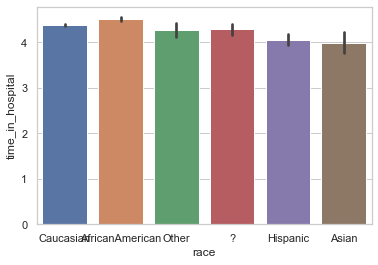

In [159]:
data_total

sns.barplot(data_total['race'], data_total['time_in_hospital'])

In [160]:
X = data_total.filter(items=['race'])

X = pd.get_dummies(X, columns=['race'])

y = data['time_in_hospital']

reg = LinearRegression().fit(X, y)

reg.score(X, y)

corr = data_total.corr()

corr

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
encounter_id,1.000000,0.512028,-0.158961,-0.132876,-0.112402,-0.062221,-0.026062,-0.014225,0.076113,0.103756,0.082803,0.030962,0.265149
patient_nbr,0.512028,1.000000,-0.011128,-0.136814,-0.032568,-0.024092,0.015946,-0.015570,0.020665,0.103379,0.062352,0.012480,0.226847
admission_type_id,-0.158961,-0.011128,1.000000,0.083483,0.106654,-0.012500,-0.143713,0.129888,0.079535,0.026511,-0.019116,-0.038161,-0.117126
discharge_disposition_id,-0.132876,-0.136814,0.083483,1.000000,0.018193,0.162748,0.023415,0.015921,0.108753,-0.008715,-0.024471,0.020787,0.046891
admission_source_id,-0.112402,-0.032568,0.106654,0.018193,1.000000,-0.006965,0.048885,-0.135400,-0.054533,0.027244,0.059892,0.036314,0.072114
time_in_hospital,-0.062221,-0.024092,-0.012500,0.162748,-0.006965,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186
num_lab_procedures,-0.026062,0.015946,-0.143713,0.023415,0.048885,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_procedures,-0.014225,-0.015570,0.129888,0.015921,-0.135400,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734
num_medications,0.076113,0.020665,0.079535,0.108753,-0.054533,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,0.261526
number_outpatient,0.103756,0.103379,0.026511,-0.008715,0.027244,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,0.094152


In [161]:
data = pd.read_csv("./datathon_data/Diabetes_Data_1999_2008.csv")
adult19 = pd.read_csv("./datathon_data/adult19.csv")

admission_type = pd.read_csv("./datathon_data/Admission_Type_Mapping.csv")
admission_source = pd.read_csv("./datathon_data/Admission_Source_Mapping.csv")
discharge = pd.read_csv("./datathon_data/Discharge_Disposition_Mapping.csv")

atlas = pd.read_csv("./datathon_data/DiabetesAtlasData.csv")
yearstuff = pd.read_csv("./datathon_data/yearstuff.csv")


## Education level versus Diabetes Rates over Time

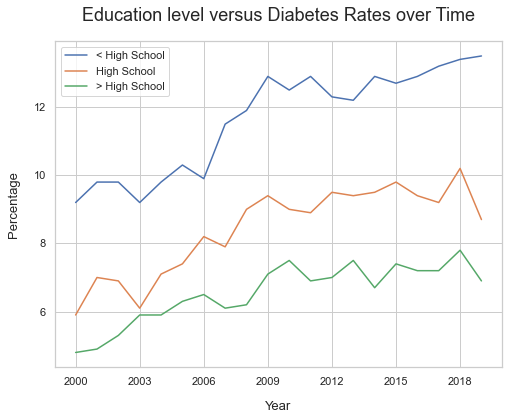

In [259]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.lineplot(data=atlas, x="Year", y="< High School", label="< High School")
sns.lineplot(data=atlas, x="Year", y="High School", label="High School")
sns.lineplot(data=atlas, x="Year", y="> High School", label="> High School")

plt.xticks(np.arange(2000, 2020, 3))
plt.ylabel("Percentage", labelpad=14,  fontsize=13)
plt.xlabel("Year", labelpad=14, fontsize=13)
plt.legend()
plt.title("Education level versus Diabetes Rates over Time", fontsize=18, pad=20)

plt.savefig('./test.png')

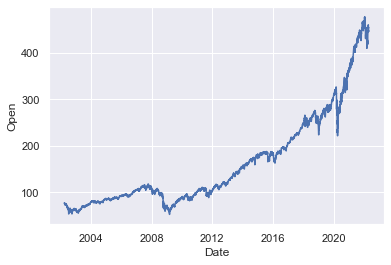

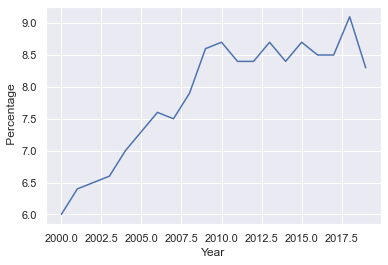

In [164]:
spx = yf.Ticker("SPY")

spx = spx.history(period="20Y")

# arr = [spx[str(i) in spx.index] for i in range(2001, 2019)]
# arr

# spx['2001' in spx.index
    
# '2001' in spx.index

# np.flatnonzero(np.core.defchararray.find(bar,foo)!=-1)
sns.lineplot(data=spx, x="Date", y="Open")
plt.show()
sns.lineplot(data=yearstuff, x="Year", y=" Percentage")
plt.show()

In [220]:
cleaned = adult19[adult19['DIBEV_A'] <= 2]
cleaned = cleaned[["DIBEV_A", "FAMINCTC_A", "DIBTYPE_A"]]


data = np.array([])
data_1 = np.array([])
data_2 = np.array([])

incomes = np.arange(10000, 220000, 10000)
for i in incomes:
    test = cleaned.query("FAMINCTC_A > " + str(i) + " & FAMINCTC_A < " + str(i + 10000))
    data = np.append(data, np.sum(test["DIBEV_A"] == 1) / len(test))
    
    test_1 = test.query("DIBEV_A == 1 & DIBTYPE_A == 1")
    test_2 = test.query("DIBEV_A == 1 & DIBTYPE_A == 2")

    data_1 = np.append(data_1, len(test_1) / len(test))
    data_2 = np.append(data_2, len(test_2) / len(test))
    
data = data / np.sum(data)
data_1 = data_1 * (1 / .9038) * (0.0885 / 0.1539380208827282)
data_2 = data_2 * (1 / .9038)* (0.8253 / 1.490290120292528)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


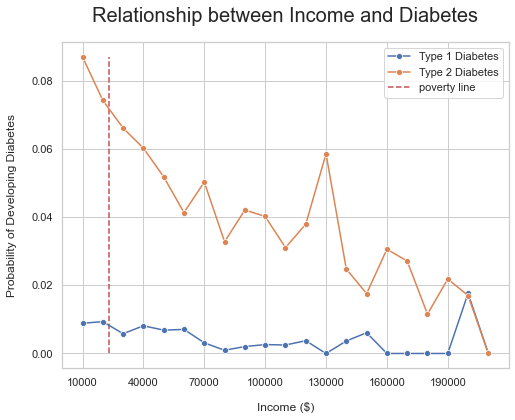

In [257]:
plt.figure(figsize=(8, 6))

sns.lineplot(incomes, data_1, label="Type 1 Diabetes", marker="o")
sns.lineplot(incomes, data_2, label="Type 2 Diabetes", marker="o")
plt.vlines(23000, 0, max(data_2), linestyles ="dashed", color="r", label="poverty line")
plt.xlabel('Income ($)', labelpad=14)
plt.title("Relationship between Income and Diabetes", fontsize=20, pad=20)
plt.ylabel('Probability of Developing Diabetes', labelpad=14)
plt.xticks(np.arange(10000, 220000, 30000))
plt.legend()
plt.savefig('./test2.png')

DIBEV_A       0.000000e+00
FAMINCTC_A    2.193551e+09
dtype: float64 DIBEV_A       0.000000e+00
FAMINCTC_A    3.279905e+09
dtype: float64


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Ttest_indResult(statistic=array([        -inf, -25.54525477]), pvalue=array([0.00000000e+000, 9.57621149e-135]))

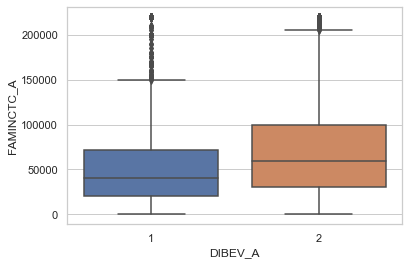

In [261]:
adult19['FAMINCTC_A']

adult19['DIBEV_A']
# 'DIBTYPE_A'

sns.boxplot(adult19[adult19['DIBEV_A'] <= 2]['DIBEV_A'], adult19['FAMINCTC_A'])

datat = adult19[adult19['DIBEV_A'] <= 2]

datat = datat.loc[:,["DIBEV_A", "FAMINCTC_A"]]

datat[datat["DIBEV_A"] == 1]

print(np.var(datat[datat["DIBEV_A"] == 1]), np.var(datat[datat["DIBEV_A"] == 2]))

stats.ttest_ind(datat[datat["DIBEV_A"] == 1], datat[datat["DIBEV_A"] == 2], equal_var=False)

In [22]:
def plot_var_race(var, var_id):
    unique, counts = np.unique(data_total[var_id], return_counts=True)
    sources = list(zip(unique, counts))    
    irrelevant_sources = []
    data_test = data_total

    for i in sources:
        if i[1] <= 1000:
            irrelevant_sources.append(i[0])
            data_test = data_test[data_test[var_id] != i[0]]
                        
    races=["Caucasian", "AfricanAmerican","Asian"]
        
    data_arr = [data_test[data_test['race'] == race][var].astype(str) for race in races]
            
    plt.hist(data_arr, color=['r','b', 'g'], alpha=0.5, density=True, label=races)
    plt.xlabel(var)
    plt.ylabel('density')
    plt.legend()

In [23]:
discharge

,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


In [24]:
admission_type_total = admission_type.rename(columns={'description': 'admission_type'})
admission_source_total = admission_source.rename(columns={'description': 'admission_source'})
data_total = pd.merge(data, admission_type_total, on="admission_type_id")
data_total = pd.merge(data_total, admission_source_total, on="admission_source_id")
admission_source_total

,admission_source_id,admission_source
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


In [6]:
unique, counts =  np.unique(data['admission_source_id'], return_counts=True)

sources = list(zip(unique, counts))
relevant_sources = []
data_2 = data_total

for i in sources:
    if i[1] <= 1000:
        relevant_sources.append(i[0])
        data_2 = data_2[data_2['admission_source_id'] != i[0]]
        
x = data_2[data_2['race'] == 'Caucasian']['admission_source']
y = data_2[data_2['race'] == 'AfricanAmerican']['admission_source']
z = data_2[data_2['race'] == 'Asian']['admission_source']

# plt.hist([x, y, z], color=['r','b', 'g'], alpha=0.5, density=True, label=["Caucasian", "African American","Asian"])
# plt.legend()
# plt.xlabel('Admission Source')
# plt.ylabel('Density')
# plt.show()

<AxesSubplot:>

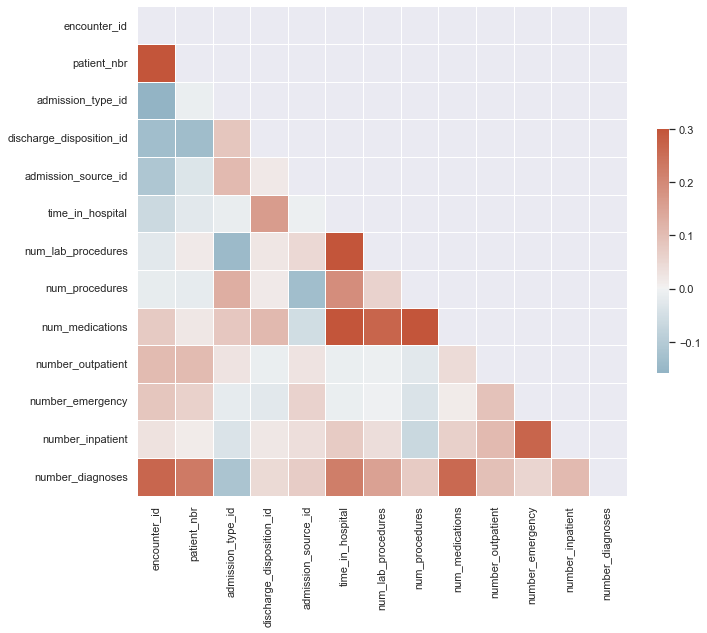

In [7]:
corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

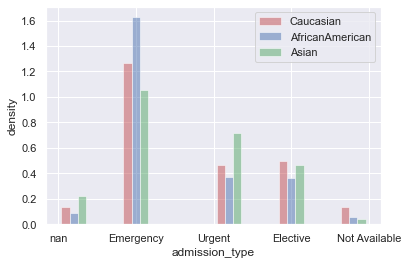

In [16]:
plot_var_race('admission_type', 'admission_type_id')

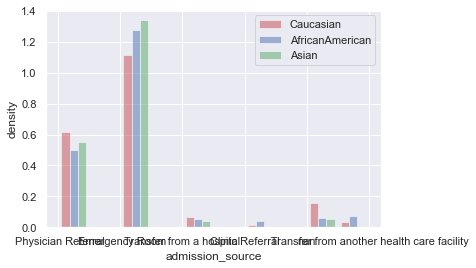

In [17]:
plot_var_race('admission_source', 'admission_source_id')

In [14]:
data_reg = data_total.filter(items=['race', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'num_lab_procedures', 'num_procedures', 'num_medications'])
data_reg


,race,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_lab_procedures,num_procedures,num_medications
0,Caucasian,[0-10),6,25,1,1,?,41,0,1
1,Caucasian,[70-80),6,25,1,10,?,56,2,24
2,AfricanAmerican,[60-70),6,25,1,9,?,60,5,17
3,Caucasian,[70-80),6,1,1,6,?,55,1,13
4,Caucasian,[60-70),6,25,1,4,?,47,0,15
...,...,...,...,...,...,...,...,...,...,...
101761,Caucasian,[70-80),3,1,22,9,MC,37,0,13
101762,Caucasian,[50-60),3,5,22,14,PO,38,0,23
101763,AfricanAmerican,[70-80),3,6,22,11,?,40,2,16
101764,Caucasian,[80-90),3,6,22,13,CM,53,0,12


In [ ]:
X, y = datasets.load_diabetes(return_X_y=True)
nrow, ncol = X.shape; print (nrow, ncol) 
nparam = ncol+1 # number of parameters
 
v_row_name = np.hstack(
    [[“const”], [“X”+str(i) for i in range(1,ncol+1)]])